In [3]:
!python --version

Python 3.13.7


In [55]:
from itertools import permutations
from random import uniform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch

In [2]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)

themeda = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(20, 35)).drop(0, axis=0)
themeda = themeda.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)
themeda = themeda.astype({"total_nitrogen": np.float64, "total_phosphorus": np.float64, "total_carbon": np.float64, "prcnt_clay": np.float64, "prcnt_course_sand": np.float64, "prcnt_fine_sand": np.float64, "prcnt_sand": np.float64, "prcnt_silt": np.float64})

themeda_seeds = pd.read_csv(r"../data/themeda_seed_coords_vin.csv")

# ___Chemical properties___
-----------------

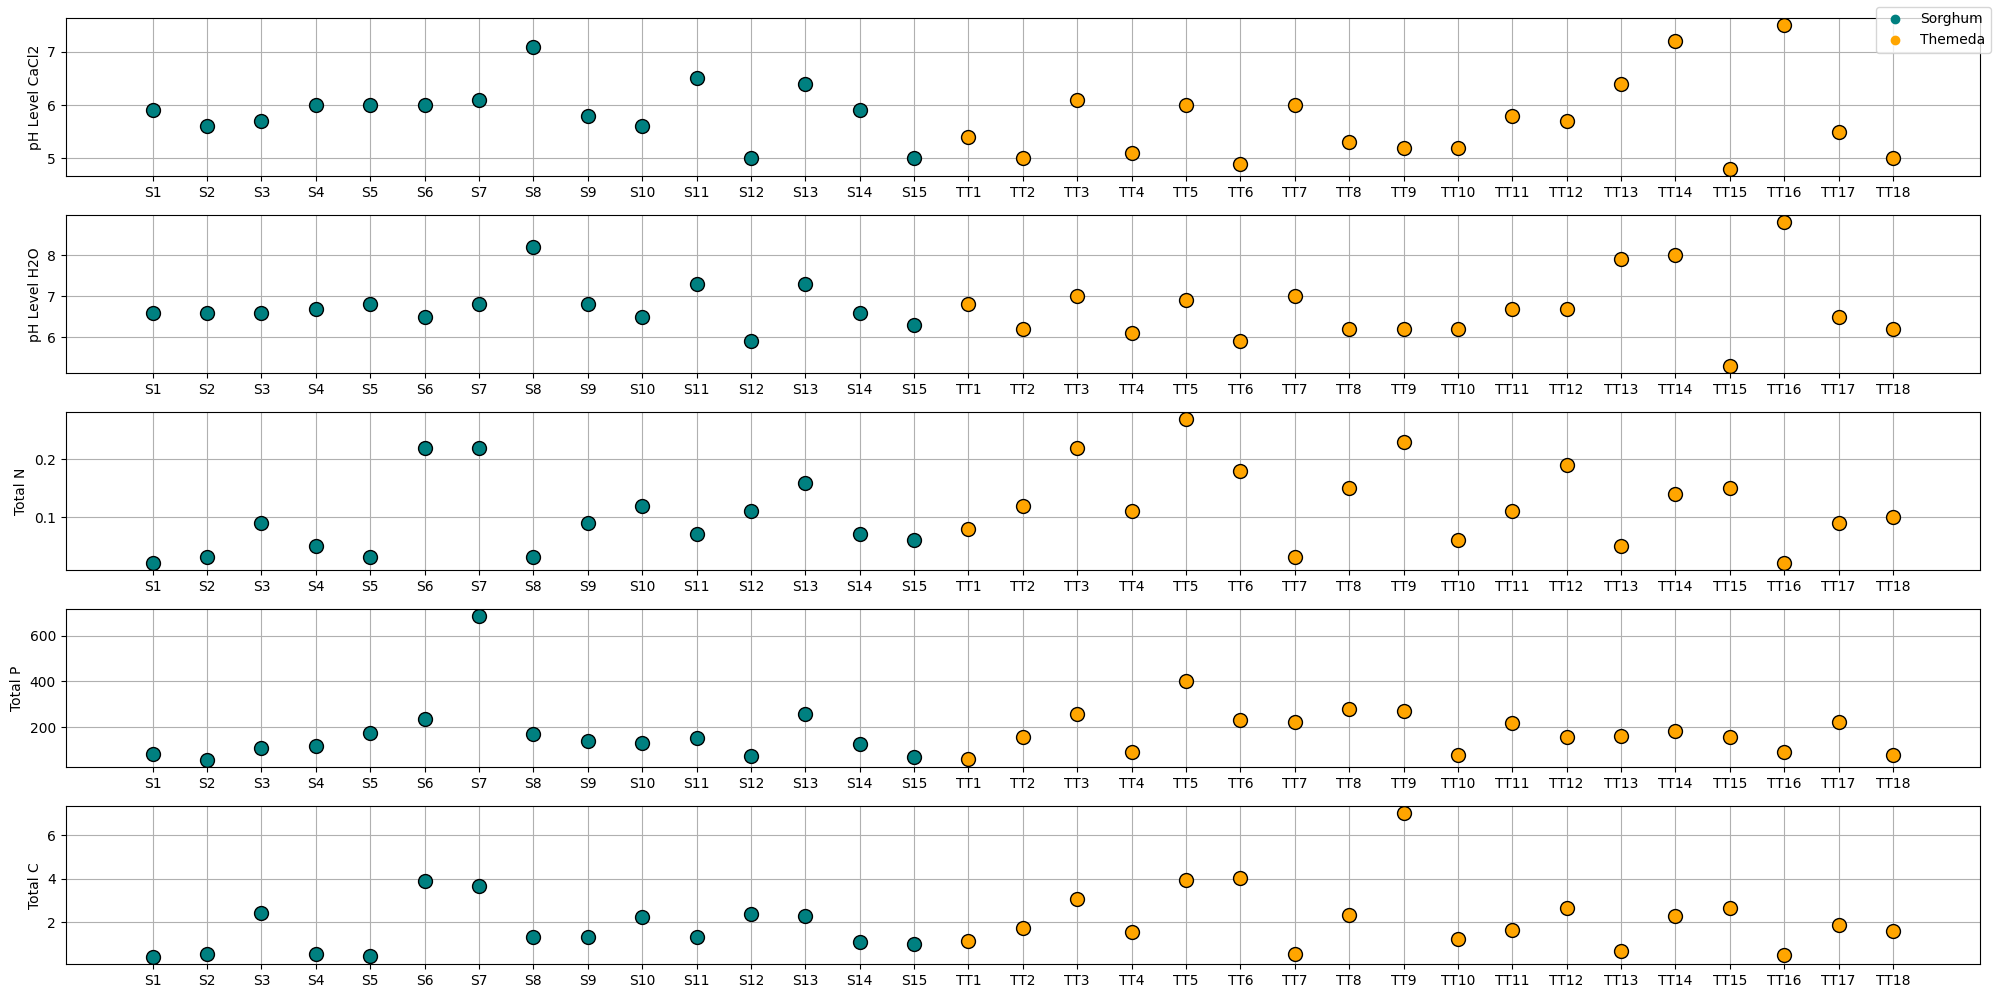

In [31]:
fig, axes = plt.subplots(nrows=5, sharex=False, sharey=False)
fig.set_size_inches(20, 10)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="teal", markersize=10)
    axis.plot(themeda.customer_sample_id, themeda[prop], linestyle="none", marker='o', mec="black", mfc="orange", markersize=10)
    axis.grid()
    axis.set_ylabel(name)

fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="teal", label="Sorghum", marker='o', linestyle="none"),
                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', linestyle="none")),
           ncols=1, loc="upper right")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_chemical_props.jpeg", dpi=500)

# ___Soil texture___
--------------

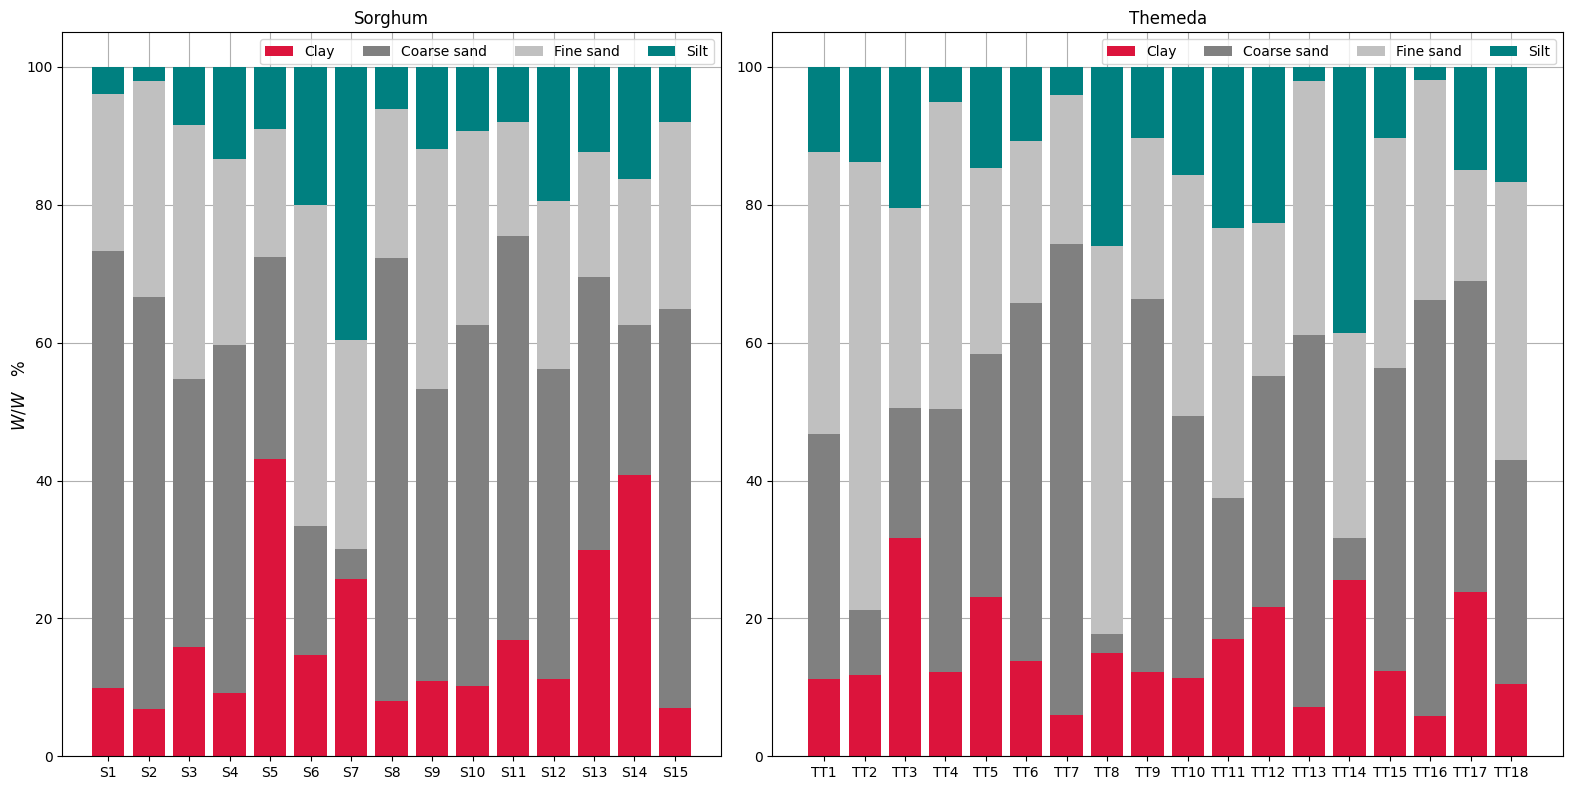

In [13]:
# Soil texture
fig, axes = plt.subplots(ncols=2, width_ratios=(15, 18))
fig.set_size_inches(16, 8)

for (axis, df, title) in zip(axes, (sorghum, themeda), ("Sorghum", "Themeda")):
    axis.bar(x=df.customer_sample_id, height=df.prcnt_clay, color="crimson", label="Clay")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_course_sand, bottom=df.prcnt_clay, color="grey", label="Coarse sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_fine_sand, bottom=df.prcnt_clay+df.prcnt_course_sand, color="silver", label="Fine sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_silt, bottom=df.prcnt_clay+df.prcnt_sand, color="teal", label="Silt")
    axis.legend(loc="upper right")
    axis.set_axisbelow(True)
    axis.grid()
    axis.legend(loc="upper right", ncols=4)
    axis.set_title(title)
fig.supylabel(r"$W/W\hspace{1}\%$")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_soil_texture.jpeg", dpi=500)

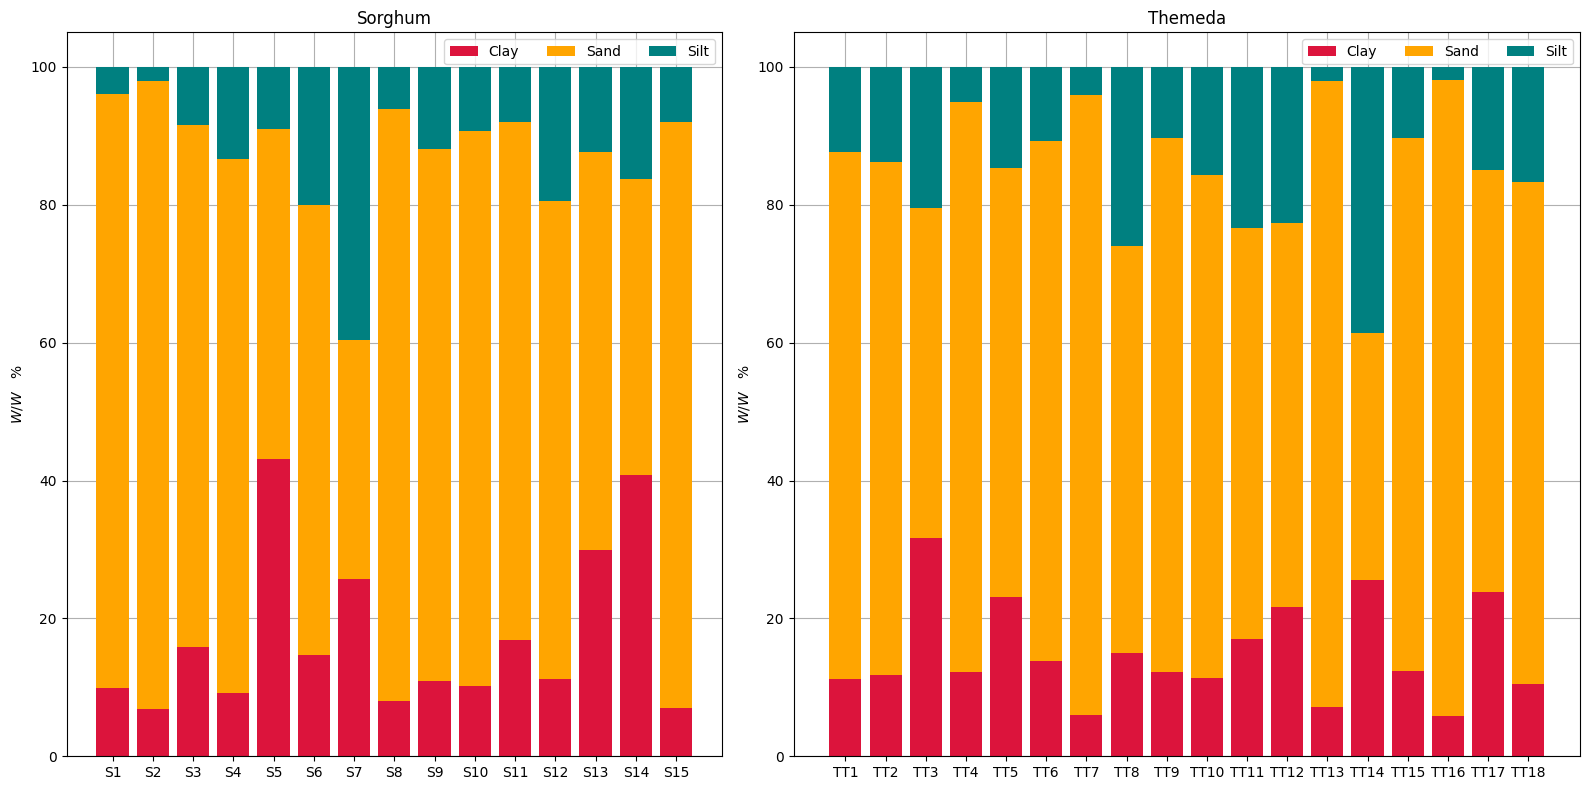

In [9]:
# without differentiating sand into coarse and fine sand

fig, axes = plt.subplots(ncols=2, width_ratios=(15, 18))
fig.set_size_inches(16, 8)

for (axis, df, title) in zip(axes, (sorghum, themeda), ("Sorghum", "Themeda")):
    axis.bar(x=df.customer_sample_id, height=df.prcnt_clay, color="crimson", label="Clay")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_sand, bottom=df.prcnt_clay, color="orange", label="Sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_silt, bottom=df.prcnt_clay+df.prcnt_sand, color="teal", label="Silt")
    axis.legend(loc="upper right", ncols=3)
    axis.set_axisbelow(True)
    axis.grid()
    axis.set_ylabel(r"$W/W\hspace{1}\%$")
    axis.set_title(title)

plt.tight_layout()
plt.show()

# ___Goegraphics___
-------------

In [9]:
sorghum;

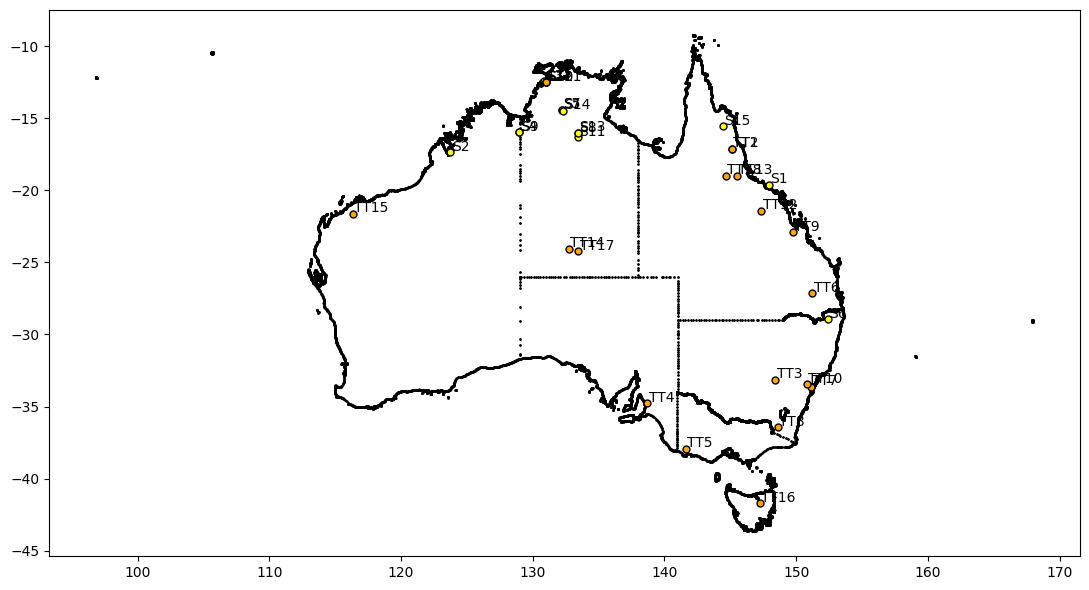

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(11, 6)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in sorghum.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")    
# axes.legend()
plt.tight_layout()
plt.show()

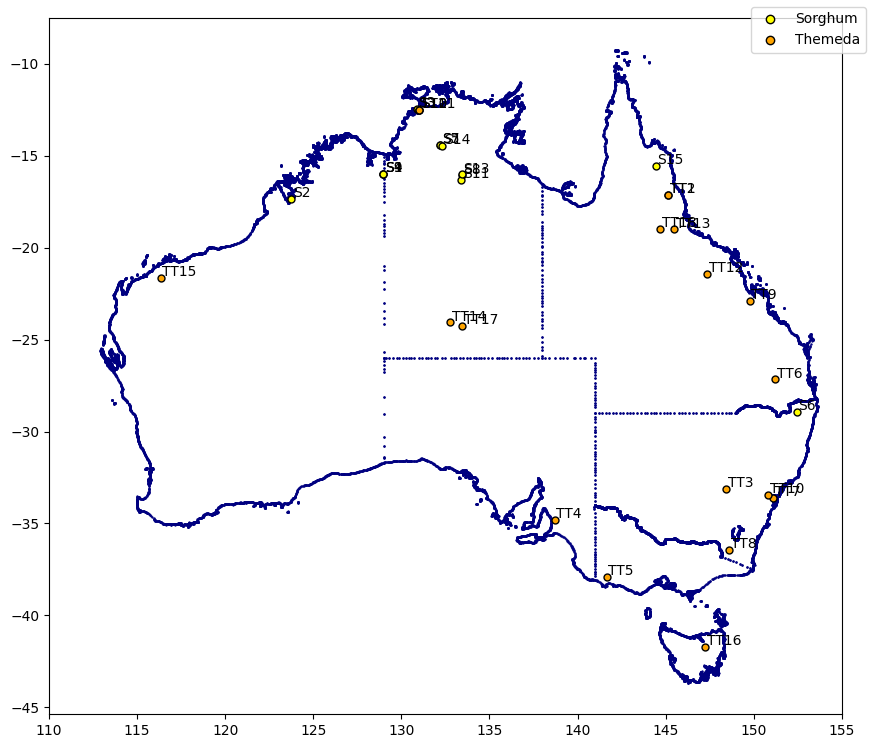

In [35]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black") 
fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="yellow", label="Sorghum", marker='o', markeredgecolor="black", linestyle="none"),
                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', markeredgecolor="black", linestyle="none")),
           ncols=1)#, loc="upper right") 
axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_sample_locations.jpeg", format="jpeg", dpi=500)

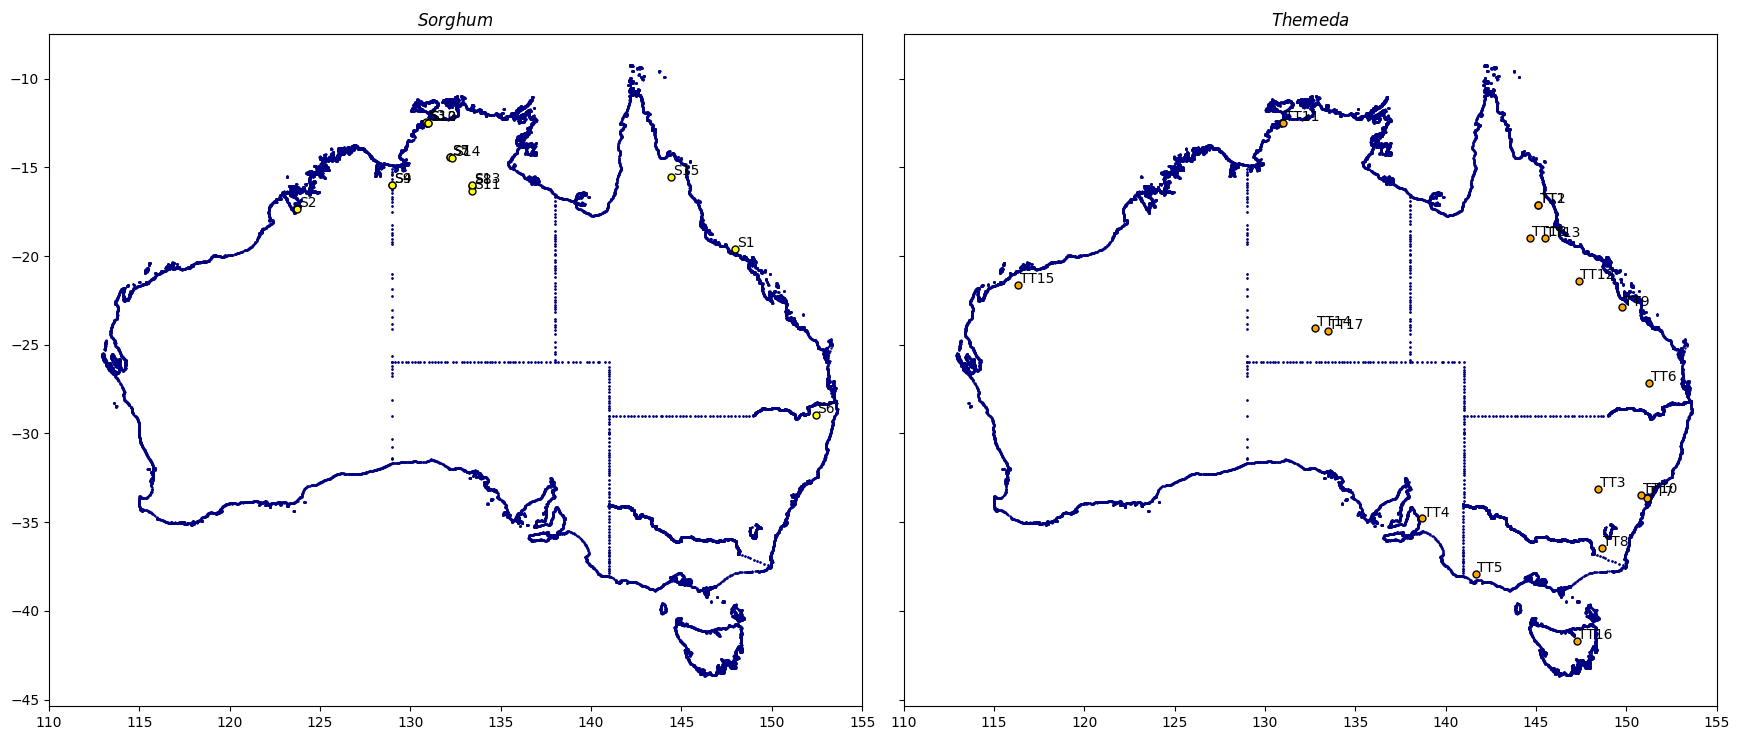

In [9]:
fig, (axes_s, axes_t) = plt.subplots(ncols=2, sharex=True, sharey=True)
fig.set_size_inches(8.75*2, 7.5)

axes_s.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
axes_t.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)

for (_, (sample, lat, long)) in sorghum.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes_s.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes_s.text(x=long+.1, y=lat+.1, s=sample, color="black")
axes_s.set_title(r"$Sorghum$")

for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes_t.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes_t.text(x=long+.1, y=lat+.1, s=sample, color="black") 
axes_t.set_title(r"$Themeda$")

# fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="yellow", label="Sorghum", marker='o', markeredgecolor="black", linestyle="none"),
#                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', markeredgecolor="black", linestyle="none")),
#           ncols=1)#, loc="upper right")

axes_s.set_xlim(110, 155)
axes_t.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_sample_locations_separate.jpeg", format="jpeg", dpi=500)

## ___Themeda___
----------------

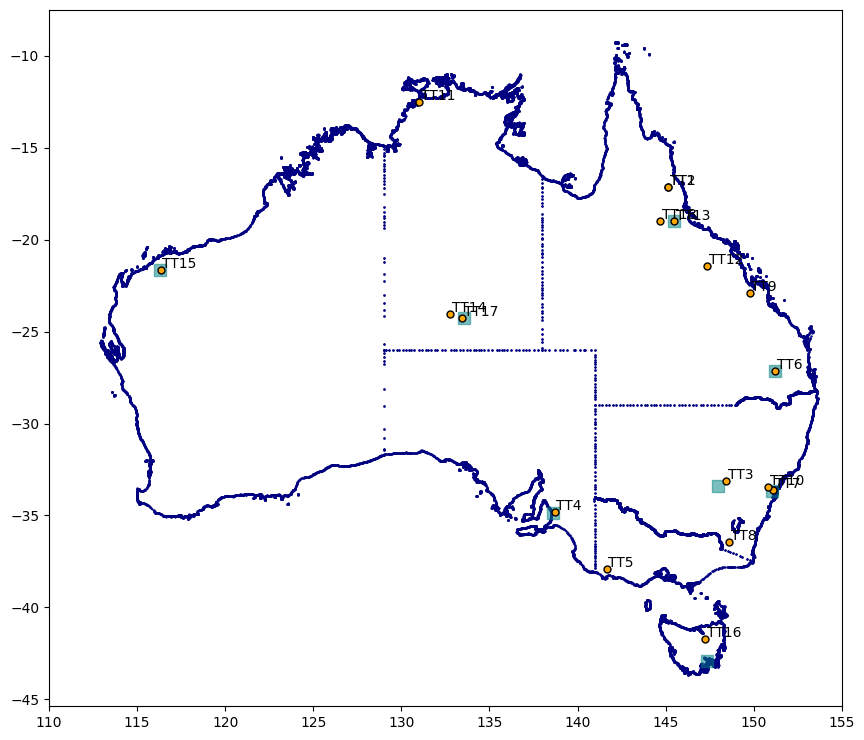

In [3]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")

axes.scatter(themeda_seeds.longitude, themeda_seeds.latitude, edgecolor="teal", facecolor="teal", s=70, marker='s', alpha=0.51)

axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_vin_themeda_locations.jpeg", format="jpeg", dpi=500)

In [4]:
CHOSEN_SITES = ("TT4", "TT6", "TT7", "TT13", "TT15", "TT17")
themeda_subset = themeda.query("customer_sample_id.isin(@CHOSEN_SITES)")

In [82]:
for _ in themeda_subset[["latitude", "longitude"]].iterrows():
    print(_)

(4, latitude     -34.784167
longitude    138.696667
Name: 4, dtype: float64)
(6, latitude     -27.156601
longitude    151.235198
Name: 6, dtype: float64)
(7, latitude     -33.62908
longitude    151.11302
Name: 7, dtype: float64)
(13, latitude     -19.001291
longitude    145.473311
Name: 13, dtype: float64)
(15, latitude     -21.637977
longitude    116.334303
Name: 15, dtype: float64)
(17, latitude     -24.235
longitude    133.459
Name: 17, dtype: float64)


In [79]:
[FancyArrowPatch(posA=(start[1].latitude, start[1].longitude), posB=(end[1].latitude, end[1].longitude)) for start in themeda_subset[["latitude", "longitude"]].iterrows() for end in themeda_subset[["latitude", "longitude"]].iterrows()];

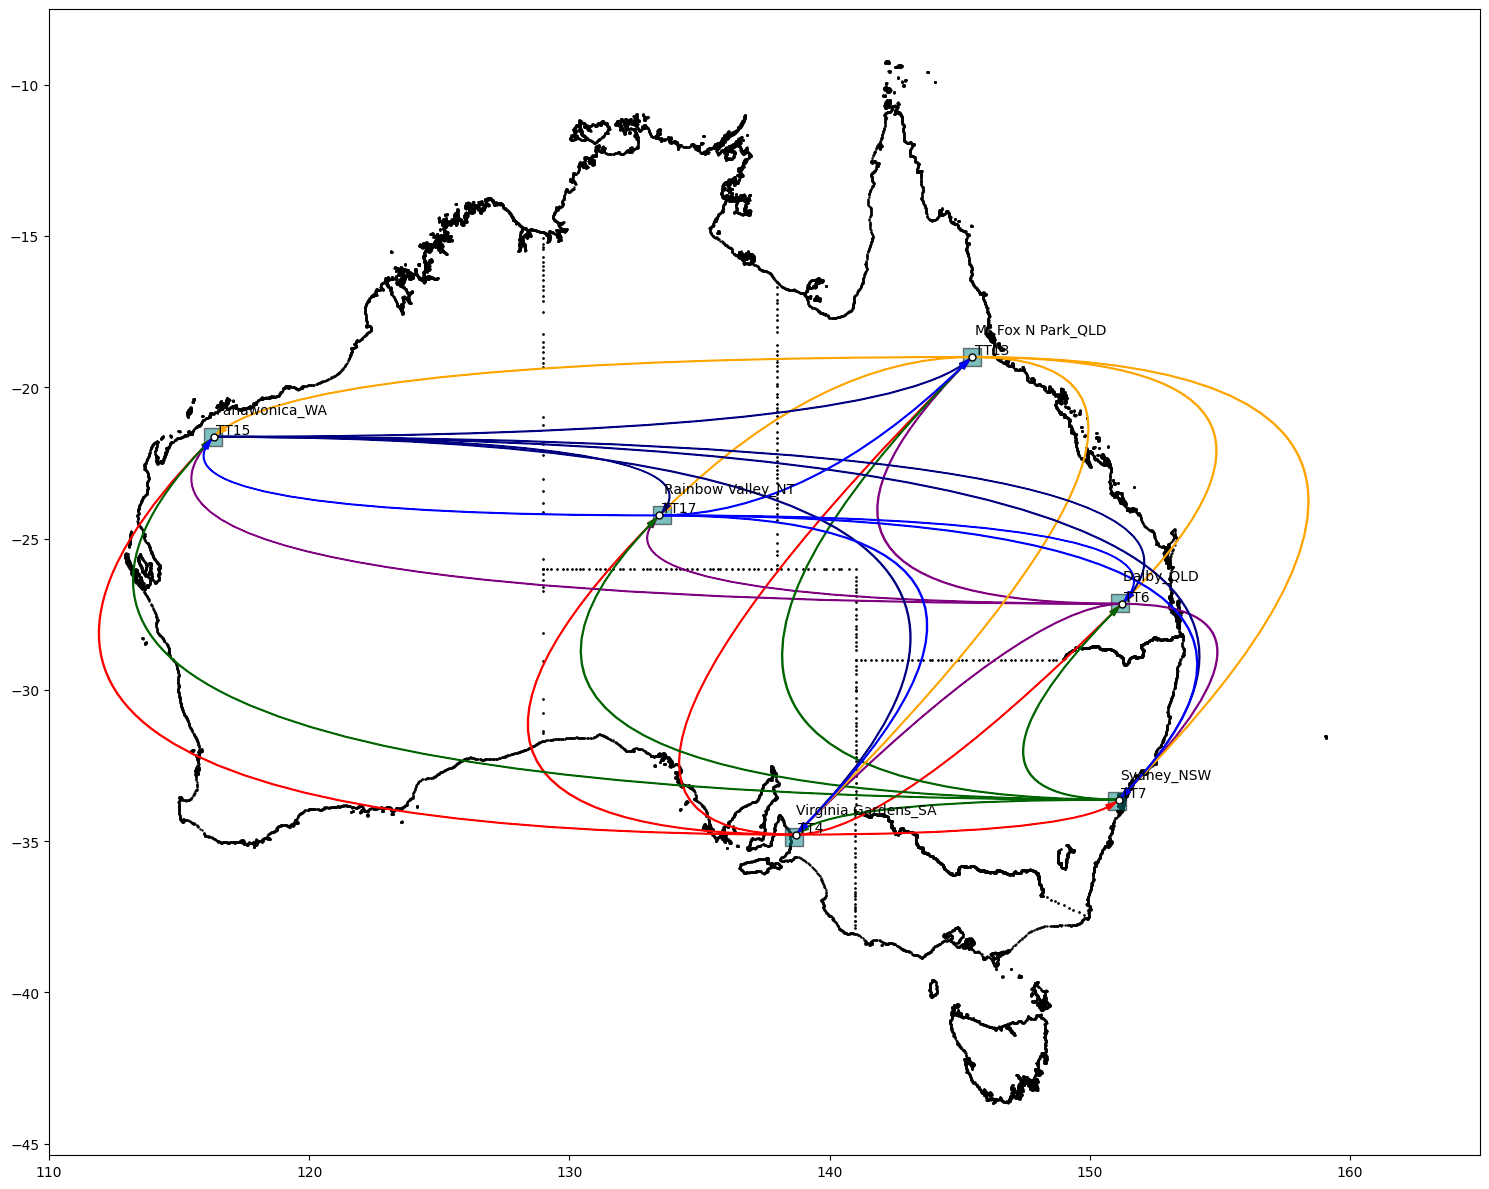

In [108]:
fig, axes = plt.subplots()
fig.set_size_inches(15, 12)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in themeda_subset.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="white", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")

for (_, (site, lat, long)) in themeda_seeds.drop(index=[2, 3]).loc[:, ["Location", "latitude", "longitude"]].iterrows():
    axes.scatter(long, lat, edgecolor="black", facecolor="teal", s=150, marker='s', alpha=0.51)
    axes.text(x=long+.1, y=lat+.75, s=site, color="black")

ARROW_COLORS = ("red", "purple", "darkgreen", "orange", "navy", "blue")
for (col, start) in zip(ARROW_COLORS, themeda_subset[["latitude", "longitude"]].iterrows()):
    for end in themeda_subset[["latitude", "longitude"]].iterrows():
        axes.add_patch(FancyArrowPatch(posA=(start[1].longitude, start[1].latitude), #(116.334303, -21.637977), # that's Panawonica
                                       posB=(end[1].longitude, end[1].latitude), #(end[1].longitude + uniform(-0.25, 0.25), end[1].latitude + uniform(-0.25, 0.25)), # ADD A LITTLE JITTER AT THE END POINT
                                       arrowstyle="simple, tail_width=0.5, head_width=4, head_length=8", connectionstyle="angle3,angleA=0,angleB=45", color=col))

axes.set_xlim(110, 165)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/recip.png", format=r"png", dpi=600)

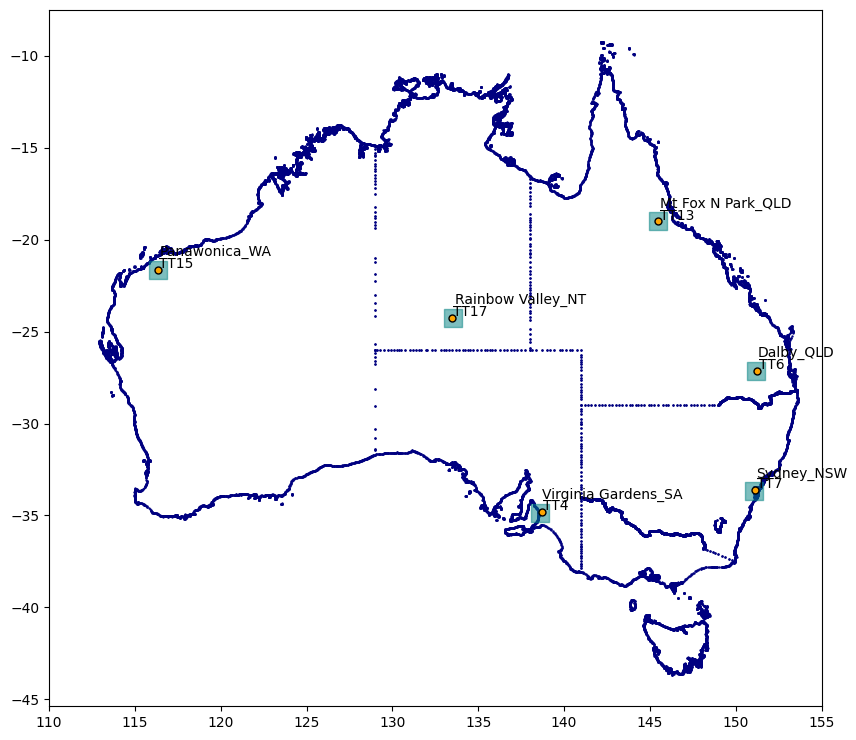

In [12]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)

for (_, (sample, lat, long)) in themeda_subset.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")

for (_, (site, lat, long)) in themeda_seeds.drop(index=[2, 3]).loc[:, ["Location", "latitude", "longitude"]].iterrows():
    axes.scatter(long, lat, edgecolor="teal", facecolor="teal", s=150, marker='s', alpha=0.51)
    axes.text(x=long+.1, y=lat+.75, s=site, color="black")

axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/recip.png", format=r"png", dpi=500)

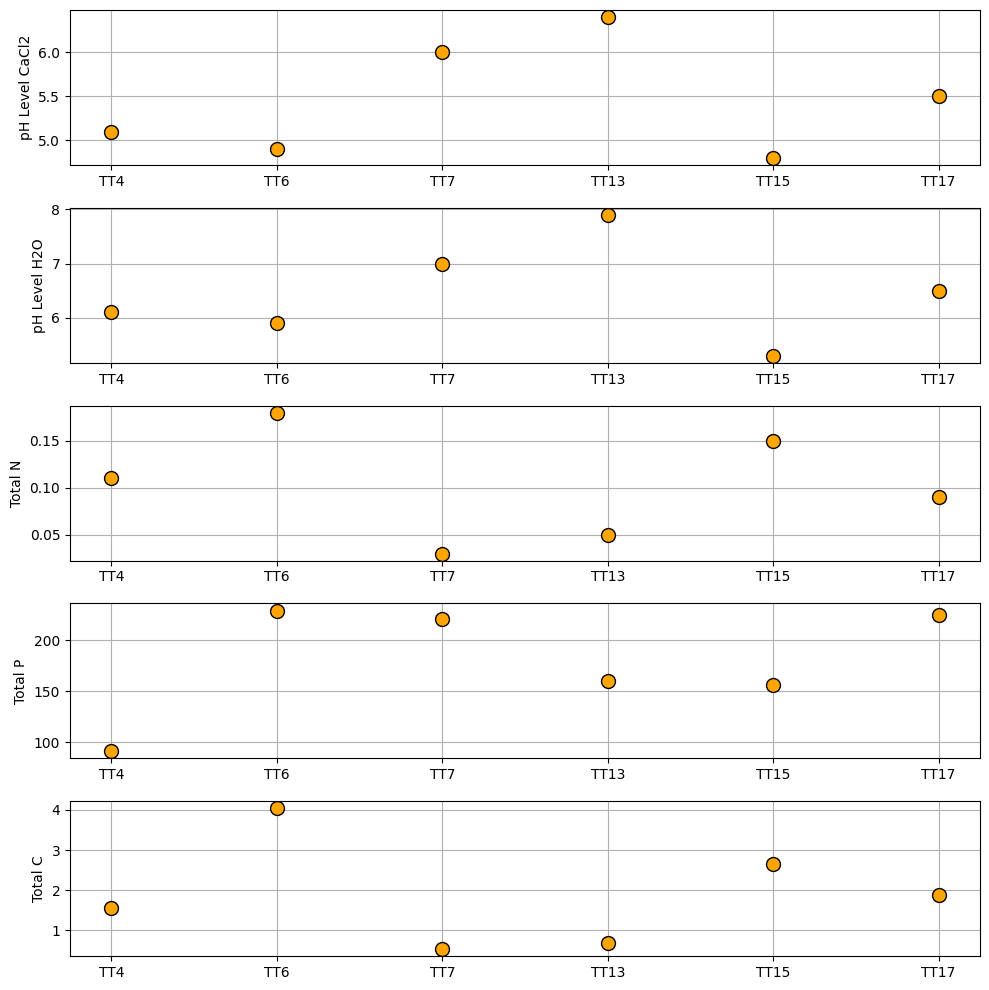

In [7]:
fig, axes = plt.subplots(nrows=5, sharex=False, sharey=False)
fig.set_size_inches(10, 10)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(themeda_subset.customer_sample_id, themeda_subset[prop], linestyle="none", marker='o', mec="black", mfc="orange", markersize=10)
    axis.grid()
    axis.set_ylabel(name)

plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_themeda_chemical_props.jpeg", dpi=500)

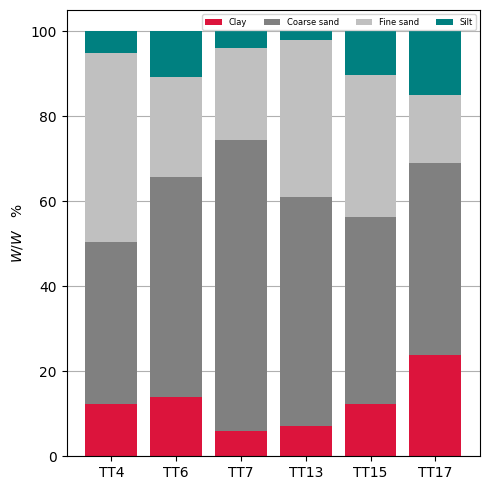

In [8]:
# Soil texture
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)

axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_clay, color="crimson", label="Clay")
axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_course_sand, bottom=themeda_subset.prcnt_clay, color="grey", label="Coarse sand")
axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_fine_sand, bottom=themeda_subset.prcnt_clay+themeda_subset.prcnt_course_sand, color="silver", label="Fine sand")
axes.bar(x=themeda_subset.customer_sample_id, height=themeda_subset.prcnt_silt, bottom=themeda_subset.prcnt_clay+themeda_subset.prcnt_sand, color="teal", label="Silt")
axes.set_axisbelow(True)
axes.grid(axis='y')
axes.legend(loc="upper right", ncols=4, fontsize=6)
axes.set_ylabel(r"$W/W\hspace{1}\%$")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_themeda_subset_soil_texture.jpeg", dpi=500)

## ___Metereology___
----------------

In [10]:
themeda_subset.loc[:, ["customer_sample_id", "latitude", "longitude"]]

,customer_sample_id,latitude,longitude
4,TT4,-34.784167,138.696667
6,TT6,-27.156601,151.235198
7,TT7,-33.629080,151.113020
13,TT13,-19.001291,145.473311
15,TT15,-21.637977,116.334303
17,TT17,-24.235000,133.459000


In [11]:
themeda_seeds

,Location,latitude,longitude
0,Rainbow Valley_NT,-24.237644,133.553612
1,Panawonica_WA,-21.644900,116.323300
2,Forbes_NSW,-33.407612,147.965494
3,Hobart_TAS,-42.905670,147.323016
4,Dalby_QLD,-27.114868,151.181761
5,Virginia Gardens_SA,-34.853889,138.620556
6,Mt Fox N Park_QLD,-19.001300,145.473117
7,Sydney_NSW,-33.688102,151.062410


In [ ]:
climate = { # for the 6 sites we have seeds for, data collected from https://www.bom.gov.au/climate/data/ using the coordinates provided by Vin
    "site": ["Virginia Gardens", "Dalby", "Sydney", "Girringun National Park", "Panawonica", "Rainbow Valley"],
    "state": ["SA", "QLD", "NSW", "QLD", "WA", "NT"],
    "station_id": []
    "map": [], # mean annual precipitation
    "mat": [] # mean annual temperature
}